In [1]:
import os, sys
import collections
import numpy as np
from scipy.special import logsumexp
import matplotlib.markers as markers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import timeit
from scipy.stats import median_abs_deviation as mad
import pandas as pd
import multiprocessing
import cProfile
import itertools
import warnings
warnings.filterwarnings('ignore') # this is just to hide all the warnings

import matplotlib.pyplot as plt # change font globally to Times 
plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.sans-serif": ["Times New Roman"],
    "font.size": 12})

os.chdir(sys.path[0]) # ensure working direcotry is set same as the file

# LM -- Speed
## Iterations required to make same amount of descent
### SCAD

In [2]:
SCAD_sim_results = np.load("./tasks/task1speed/SCAD_sim_results.npy")

SCAD_sim_results_mean = np.median(SCAD_sim_results, 2)
print("Median:")
print("AG: ",SCAD_sim_results_mean[...,0])
print("ISTA: ",SCAD_sim_results_mean[...,1])
print("original settings: ",SCAD_sim_results_mean[...,2])
SCAD_sim_results_se = np.around(mad(SCAD_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",SCAD_sim_results_se[...,0])
print("ISTA: ",SCAD_sim_results_se[...,1])
print("original settings: ",SCAD_sim_results_se[...,2])


Median:
AG:  [[  9.  14.  23.  26.]
 [ 11.  18.  32.  50.]
 [ 37.  72. 172. 432.]]
ISTA:  [[  11.    26.    68.    93.5]
 [  21.    38.   116.   308. ]
 [ 104.   362.  2012.5    inf]]
original settings:  [[ 15.  23.  38.  41.]
 [ 19.  30.  51.  76.]
 [ 60. 111. 260. 657.]]
Scaled MAD: 
AG:  [[ 1.48  0.    1.48  1.48]
 [ 1.48  0.    1.48  1.48]
 [ 1.48  2.97  8.15 25.2 ]]
ISTA:  [[ 4.45  1.48  5.93  6.67]
 [ 7.41  2.22  6.67 19.27]
 [ 7.41 19.27 88.21   nan]]
original settings:  [[ 1.48  1.48  1.48  1.48]
 [ 1.48  1.48  1.48  2.97]
 [ 2.97  4.45 11.86 37.06]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


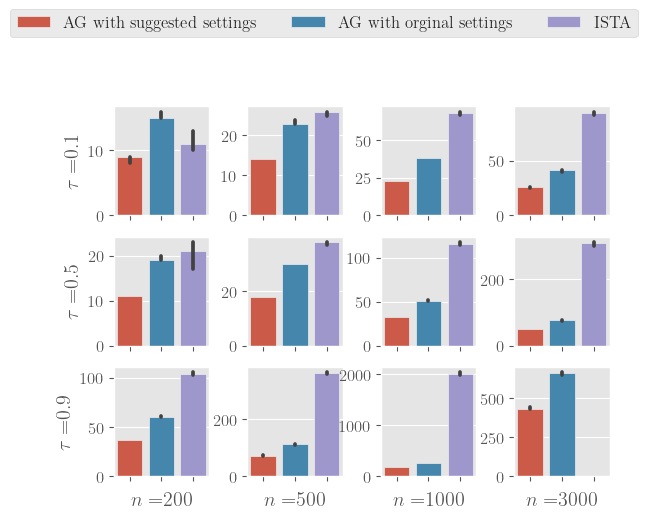

In [3]:
fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'AG with orginal settings'], data=SCAD_sim_results[i,j,:,:3])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'AG with orginal settings', 'ISTA'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('LM-fig_k_SCAD.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

### MCP

In [4]:
MCP_sim_results = np.load("./tasks/task1speed/MCP_sim_results.npy")

MCP_sim_results_mean = np.median(MCP_sim_results, 2)
print("Median:")
print("AG: ",MCP_sim_results_mean[...,0])
print("ISTA: ",MCP_sim_results_mean[...,1])
print("original settings: ",MCP_sim_results_mean[...,2])
MCP_sim_results_se = np.around(mad(MCP_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",MCP_sim_results_se[...,0])
print("ISTA: ",MCP_sim_results_se[...,1])
print("original settings: ",MCP_sim_results_se[...,2])


Median:
AG:  [[  6.   10.   17.   25. ]
 [ 10.   15.   26.   48. ]
 [ 31.   68.  152.  428.5]]
ISTA:  [[   7.    16.    48.    90. ]
 [  12.    28.    94.   289.5]
 [  82.   345.  1897.5    inf]]
original settings:  [[  9.   18.   29.   40. ]
 [ 17.   26.   42.   74.5]
 [ 50.  104.  226.5 657. ]]
Scaled MAD: 
AG:  [[ 1.48  0.    0.    1.48]
 [ 1.48  0.74  1.48  1.48]
 [ 1.48  2.97  7.41 24.46]]
ISTA:  [[ 1.48  0.    2.97  5.93]
 [ 2.97  1.48  5.93 17.05]
 [ 5.93 19.27 85.99   nan]]
original settings:  [[ 0.    1.48  1.48  1.48]
 [ 1.48  1.48  1.48  2.22]
 [ 1.48  3.71 10.38 37.06]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


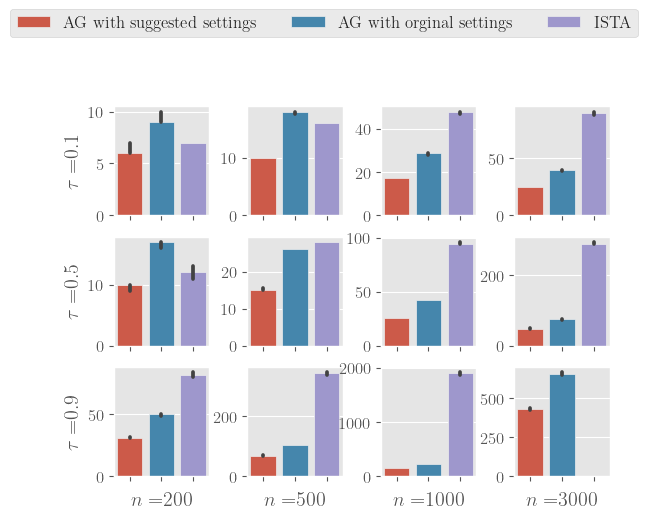

In [5]:
fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'AG with orginal settings'], data=MCP_sim_results[i,j,:,:3])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'AG with orginal settings', 'ISTA'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('LM-fig_k_MCP.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

## Computing time
### SCAD

Median:
AG:  [[ 0.57986508  0.79744337  2.05704103  2.89973303]
 [ 0.68877365  0.90181195  2.29636145  2.70044755]
 [ 1.46700638  3.84743177 11.46115646 18.1261116 ]]
ISTA:  [[ 1.48134089  1.76513855  2.80713007 15.48370722]
 [ 1.97214973  2.08141082  3.45216337  9.63362782]
 [ 4.4692409   5.13482764 14.83246429 15.19615942]]
coordinate descent:  [[  23.53419124   26.33330593   43.52702698  171.39840058]
 [  24.78050509   26.40395431   64.25809761  288.97075018]
 [  27.98401186   74.78175678  323.95155025 1580.45784137]]
Scaled MAD: 
AG:  [[0.14 0.18 0.35 0.86]
 [0.12 0.17 0.21 0.31]
 [0.2  0.17 0.47 0.17]]
ISTA:  [[0.39 0.64 0.83 0.53]
 [0.42 0.67 0.72 3.06]
 [1.15 1.03 0.06 0.1 ]]
coordinate descent:  [[ 2.34  4.16  3.28  6.92]
 [ 4.16  4.29  2.38 11.84]
 [ 6.54  2.14 13.74 68.85]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


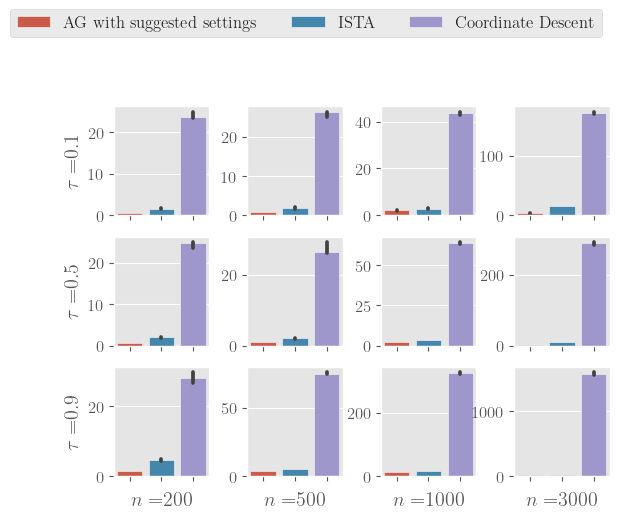

In [6]:
SCAD_sim_results = np.load("./tasks/task1speed/SCAD_sim_results.npy")

SCAD_sim_results_mean = np.median(SCAD_sim_results, 2)
print("Median:")
print("AG: ",SCAD_sim_results_mean[...,3])
print("ISTA: ",SCAD_sim_results_mean[...,4])
print("coordinate descent: ",SCAD_sim_results_mean[...,5])
SCAD_sim_results_se = np.around(mad(SCAD_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",SCAD_sim_results_se[...,3])
print("ISTA: ",SCAD_sim_results_se[...,4])
print("coordinate descent: ",SCAD_sim_results_se[...,5])

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'Coordinate Descent'], data=SCAD_sim_results[i,j,:,3:])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'ISTA', 'Coordinate Descent'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('LM-time_SCAD.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

### MCP

Median:
AG:  [[ 0.42947959  0.5732343   1.24685716  2.19148149]
 [ 0.51074465  0.68219589  1.55047938  2.31900557]
 [ 1.13536693  3.00986836  8.94170216 15.0118243 ]]
ISTA:  [[ 1.06845056  1.26296233  1.82153977 10.92524257]
 [ 1.4748289   1.54268509  2.20267022  7.94552177]
 [ 3.44914847  3.79557535 11.65564429 12.12494301]]
coordinate descent:  [[  19.43534933   21.69835209   34.39551703  135.75043174]
 [  20.72193334   22.06397408   50.67752018  226.43664397]
 [  23.35001344   59.17638479  256.44346864 1256.73935365]]
Scaled MAD: 
AG:  [[0.07 0.14 0.17 0.76]
 [0.11 0.14 0.08 0.26]
 [0.15 0.12 0.34 0.12]]
ISTA:  [[0.3  0.39 0.53 2.11]
 [0.34 0.39 0.55 2.25]
 [0.76 0.68 0.05 0.05]]
coordinate descent:  [[ 3.51  3.56  3.29  5.49]
 [ 4.21  5.23  1.94  9.13]
 [ 3.56  1.77 10.87 52.42]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


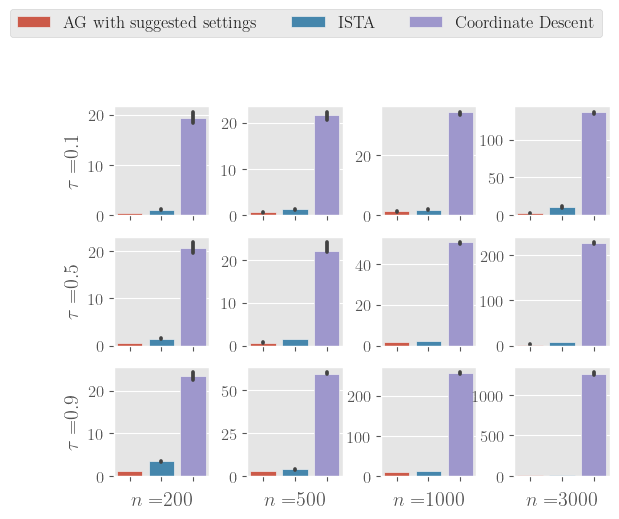

In [7]:
MCP_sim_results = np.load("./tasks/task1speed/MCP_sim_results.npy")

MCP_sim_results_mean = np.median(MCP_sim_results, 2)
print("Median:")
print("AG: ",MCP_sim_results_mean[...,3])
print("ISTA: ",MCP_sim_results_mean[...,4])
print("coordinate descent: ",MCP_sim_results_mean[...,5])
MCP_sim_results_se = np.around(mad(MCP_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",MCP_sim_results_se[...,3])
print("ISTA: ",MCP_sim_results_se[...,4])
print("coordinate descent: ",MCP_sim_results_se[...,5])

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'Coordinate Descent'], data=MCP_sim_results[i,j,:,3:])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'ISTA', 'Coordinate Descent'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('LM-time_MCP.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

# LM -- Signals
## SCAD
### AG

In [8]:
def pasta(a,b):
    '''
    A function that pastes the results all together.
    '''
    c = a.astype(str).copy()
    c = np.char.add(c, np.array([" ("]*a.size).reshape(a.shape))
    c = np.char.add(c, b.astype(str))
    c = np.char.add(c, np.array([")"]*a.size).reshape(a.shape))
    return c

In [9]:
results_SCAD_signal_recovery = np.load("./tasks/task1/results_SCAD_signal_recovery.npy")

results_SCAD_signal_recovery_mean = np.around(np.mean(results_SCAD_signal_recovery, 2),3)
results_SCAD_signal_recovery_se = np.around(np.std(results_SCAD_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_SCAD_signal_recovery_mean[...,0], results_SCAD_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_SCAD_signal_recovery_mean[...,1], results_SCAD_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_SCAD_signal_recovery_mean[...,2], results_SCAD_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_SCAD_signal_recovery_mean[...,3], results_SCAD_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_SCAD_signal_recovery_se[...,4]))


# results_SCAD_signal_recovery_median = cp.median(results_SCAD_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_SCAD_signal_recovery_median[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_median[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_median[...,2])
# print("specificity: ",results_SCAD_signal_recovery_median[...,3])
# results_SCAD_signal_recovery_mad = mad(results_SCAD_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_SCAD_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_mad[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_mad[...,2])
# print("specificity: ",results_SCAD_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.129 (0.021)' '0.504 (0.103)' '2.859 (0.493)']
 ['0.051 (0.009)' '0.155 (0.027)' '2.038 (0.328)']
 ['0.022 (0.004)' '0.084 (0.014)' '1.27 (0.272)']
 ['0.016 (0.003)' '0.063 (0.012)' '1.167 (0.199)']]
infinity-norm:  [['21.447 (2.798)' '48.472 (5.353)' '159.96 (35.95)']
 ['13.229 (2.62)' '24.778 (4.233)' '114.446 (21.17)']
 ['8.925 (2.024)' '17.917 (2.597)' '75.972 (15.129)']
 ['7.631 (1.934)' '16.107 (2.508)' '71.532 (11.583)']]
PPV:  [['0.751 (0.13)' '0.587 (0.19)' '0.493 (0.252)']
 ['0.646 (0.168)' '0.544 (0.2)' '0.343 (0.243)']
 ['0.546 (0.149)' '0.411 (0.249)' '0.202 (0.157)']
 ['0.512 (0.266)' '0.429 (0.096)' '0.208 (0.086)']]
NPV:  [['0.984 (0.001)' '0.984 (0.001)' '0.979 (0.001)']
 ['0.989 (0.001)' '0.988 (0.001)' '0.98 (0.001)']
 ['0.992 (0.001)' '0.991 (0.001)' '0.982 (0.001)']
 ['0.993 (0.001)' '0.992 (0.001)' '0.982 (0.001)']]
active set cardi:  [['25.04 (8.315)' '34.84 (19.22)' '23.06 (17.038)']
 ['46.13 (17.272)' '57.27 (25.66)' '42.53 (16.81)']
 

### ncvreg

In [10]:
results_SCAD_signal_recovery = np.load("./SCAD_MCP/LM/R_results_SCAD_signal_recovery.npy")

results_SCAD_signal_recovery=np.reshape(results_SCAD_signal_recovery, (4,3,100,5),"F") # keep array dimension true
results_SCAD_signal_recovery_mean = np.around(np.mean(results_SCAD_signal_recovery, 2),3)
results_SCAD_signal_recovery_se = np.around(np.std(results_SCAD_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_SCAD_signal_recovery_mean[...,0], results_SCAD_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_SCAD_signal_recovery_mean[...,1], results_SCAD_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_SCAD_signal_recovery_mean[...,2], results_SCAD_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_SCAD_signal_recovery_mean[...,3], results_SCAD_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_SCAD_signal_recovery_se[...,4]))

# results_SCAD_signal_recovery_median = cp.median(results_SCAD_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_SCAD_signal_recovery_median[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_median[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_median[...,2])
# print("specificity: ",results_SCAD_signal_recovery_median[...,3])
# results_SCAD_signal_recovery_mad = mad(results_SCAD_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_SCAD_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_mad[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_mad[...,2])
# print("specificity: ",results_SCAD_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.131 (0.02)' '0.493 (0.101)' '2.932 (0.577)']
 ['0.053 (0.009)' '0.157 (0.029)' '2.082 (0.336)']
 ['0.022 (0.004)' '0.083 (0.014)' '1.297 (0.257)']
 ['0.016 (0.003)' '0.063 (0.012)' '1.152 (0.214)']]
infinity-norm:  [['20.412 (2.843)' '47.143 (5.548)' '170.276 (39.395)']
 ['13.257 (2.263)' '25.142 (4.71)' '116.379 (21.92)']
 ['8.465 (1.496)' '17.806 (2.587)' '78.868 (14.161)']
 ['7.131 (1.202)' '16.144 (2.218)' '72.398 (11.701)']]
PPV:  [['0.254 (0.078)' '0.277 (0.123)' '0.287 (0.201)']
 ['0.279 (0.073)' '0.305 (0.104)' '0.263 (0.138)']
 ['0.32 (0.072)' '0.34 (0.142)' '0.21 (0.157)']
 ['0.343 (0.131)' '0.406 (0.075)' '0.208 (0.056)']]
NPV:  [['0.987 (0.001)' '0.986 (0.001)' '0.98 (0.001)']
 ['0.99 (0.001)' '0.989 (0.001)' '0.98 (0.001)']
 ['0.992 (0.001)' '0.991 (0.001)' '0.982 (0.001)']
 ['0.993 (0.001)' '0.992 (0.001)' '0.982 (0.001)']]
active set cardi:  [['102.26 (29.113)' '93.94 (37.748)' '43.23 (22.821)']
 ['119.93 (34.998)' '104.09 (30.726)' '47.91 (15.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


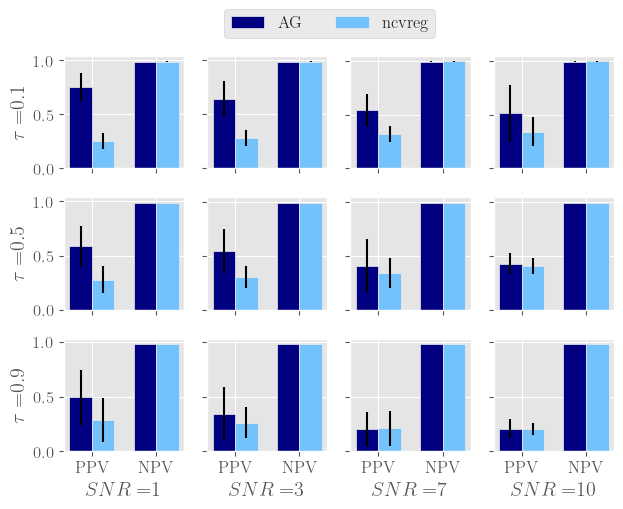

In [11]:
AG = np.load("./tasks/task1/results_SCAD_signal_recovery.npy")
AG_mean = np.mean(AG, 2)
AG_se = np.std(AG, 2)
ncvreg = np.load("./SCAD_MCP/LM/R_results_SCAD_signal_recovery.npy")
ncvreg=np.reshape(ncvreg, (4,3,100,5),"F") # keep array dimension true
ncvreg_mean = np.mean(ncvreg, 2)
ncvreg_se = np.std(ncvreg, 2)

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
SNR = np.array([1,3,7,10])

for i,j in itertools.product(range(3),range(4)):
    data = np.array([[AG_mean[j,i,2], ncvreg_mean[j,i,2]],
                     [AG_mean[j,i,3], ncvreg_mean[j,i,3]]])
    data_se = np.array([[AG_se[j,i,2], ncvreg_se[j,i,2]],
                        [AG_se[j,i,3], ncvreg_se[j,i,3]]])
    length = len(data)
    x_labels = ["PPV", "NPV"]
    width = 0.35 # width of bar
    x = np.arange(length)
    axes[i,j].bar(x, data[:,0], width, color='#000080', label='AG', yerr=data_se[:,0])
    axes[i,j].bar(x + width, data[:,1], width, color='#73C2FB', label='ncvreg', yerr=data_se[:,1])
#     ax.set_ylabel('Proportion')
#     ax.set_ylim(0,75)
    axes[i,j].set_xticks(x + width/2)
    axes[i,j].set_xticklabels(x_labels)
    axes[i,j].set_xlabel('Predicted Values')
#     ax.set_title('Title')
#     axes[i,j].legend()
    
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=None)

for ax in axes.flat:
    ax.label_outer()

# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout(pad=.2)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=4, bbox_to_anchor=(.35, 1.075))

plt.tight_layout()
plt.savefig('LM-SCAD-pv.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

## MCP
### AG

In [12]:
results_MCP_signal_recovery = np.load("./tasks/task1/results_MCP_signal_recovery.npy")

results_MCP_signal_recovery_mean = np.around(np.mean(results_MCP_signal_recovery, 2),3)
results_MCP_signal_recovery_se = np.around(np.std(results_MCP_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_MCP_signal_recovery_mean[...,0], results_MCP_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_MCP_signal_recovery_mean[...,1], results_MCP_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_MCP_signal_recovery_mean[...,2], results_MCP_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_MCP_signal_recovery_mean[...,3], results_MCP_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_MCP_signal_recovery_se[...,4]))

# results_MCP_signal_recovery_median = cp.median(results_MCP_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_MCP_signal_recovery_median[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_median[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_median[...,2])
# print("specificity: ",results_MCP_signal_recovery_median[...,3])
# results_MCP_signal_recovery_mad = mad(results_MCP_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_MCP_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_mad[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_mad[...,2])
# print("specificity: ",results_MCP_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.134 (0.024)' '0.543 (0.117)' '2.955 (0.51)']
 ['0.05 (0.01)' '0.168 (0.032)' '1.946 (0.333)']
 ['0.022 (0.004)' '0.088 (0.015)' '1.507 (0.3)']
 ['0.015 (0.003)' '0.059 (0.012)' '1.079 (0.285)']]
infinity-norm:  [['22.688 (2.928)' '50.134 (5.825)' '163.886 (35.84)']
 ['14.011 (2.744)' '25.204 (4.825)' '107.147 (19.601)']
 ['8.933 (2.029)' '18.473 (2.999)' '86.237 (17.206)']
 ['7.721 (2.016)' '15.002 (3.023)' '68.41 (13.265)']]
PPV:  [['0.855 (0.095)' '0.738 (0.16)' '0.687 (0.181)']
 ['0.842 (0.109)' '0.724 (0.216)' '0.445 (0.28)']
 ['0.759 (0.171)' '0.667 (0.287)' '0.506 (0.212)']
 ['0.794 (0.105)' '0.479 (0.123)' '0.352 (0.198)']]
NPV:  [['0.983 (0.001)' '0.982 (0.001)' '0.978 (0.0)']
 ['0.987 (0.001)' '0.986 (0.001)' '0.98 (0.001)']
 ['0.991 (0.001)' '0.989 (0.001)' '0.981 (0.001)']
 ['0.992 (0.001)' '0.99 (0.001)' '0.982 (0.001)']]
active set cardi:  [['102.26 (4.959)' '93.94 (8.748)' '43.23 (6.408)']
 ['119.93 (7.835)' '104.09 (16.366)' '47.91 (14.845)']
 

### ncvreg

In [13]:
results_MCP_signal_recovery = np.load("./SCAD_MCP/LM/R_results_MCP_signal_recovery.npy")

results_MCP_signal_recovery=np.reshape(results_MCP_signal_recovery, (4,3,100,5),"F") # keep array dimension true
results_MCP_signal_recovery_mean = np.around(np.mean(results_MCP_signal_recovery, 2),3)
results_MCP_signal_recovery_se = np.around(np.std(results_MCP_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_MCP_signal_recovery_mean[...,0], results_MCP_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_MCP_signal_recovery_mean[...,1], results_MCP_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_MCP_signal_recovery_mean[...,2], results_MCP_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_MCP_signal_recovery_mean[...,3], results_MCP_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_MCP_signal_recovery_mean[...,4], results_MCP_signal_recovery_se[...,4]))

# results_MCP_signal_recovery_median = cp.median(results_MCP_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_MCP_signal_recovery_median[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_median[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_median[...,2])
# print("specificity: ",results_MCP_signal_recovery_median[...,3])
# results_MCP_signal_recovery_mad = mad(results_MCP_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_MCP_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_mad[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_mad[...,2])
# print("specificity: ",results_MCP_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.127 (0.021)' '0.495 (0.112)' '2.848 (0.375)']
 ['0.05 (0.009)' '0.164 (0.033)' '1.876 (0.337)']
 ['0.021 (0.004)' '0.085 (0.014)' '1.443 (0.261)']
 ['0.014 (0.003)' '0.059 (0.012)' '1.104 (0.211)']]
infinity-norm:  [['20.793 (2.687)' '47.928 (6.042)' '160.78 (30.234)']
 ['13.448 (2.454)' '24.955 (4.365)' '102.795 (20.161)']
 ['8.43 (1.508)' '18.067 (2.806)' '83.569 (16.416)']
 ['7.181 (1.098)' '15.222 (2.679)' '68.253 (11.907)']]
PPV:  [['0.439 (0.105)' '0.392 (0.119)' '0.385 (0.178)']
 ['0.489 (0.102)' '0.479 (0.117)' '0.37 (0.18)']
 ['0.536 (0.131)' '0.538 (0.173)' '0.499 (0.211)']
 ['0.56 (0.113)' '0.468 (0.121)' '0.352 (0.211)']]
NPV:  [['0.985 (0.001)' '0.984 (0.001)' '0.979 (0.0)']
 ['0.989 (0.001)' '0.987 (0.001)' '0.98 (0.001)']
 ['0.992 (0.001)' '0.989 (0.001)' '0.981 (0.001)']
 ['0.992 (0.001)' '0.99 (0.001)' '0.982 (0.001)']]
active set cardi:  [['50.47 (13.225)' '48.19 (16.776)' '20.66 (10.277)']
 ['60.66 (14.629)' '52.69 (16.156)' '31.23 (14.271)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


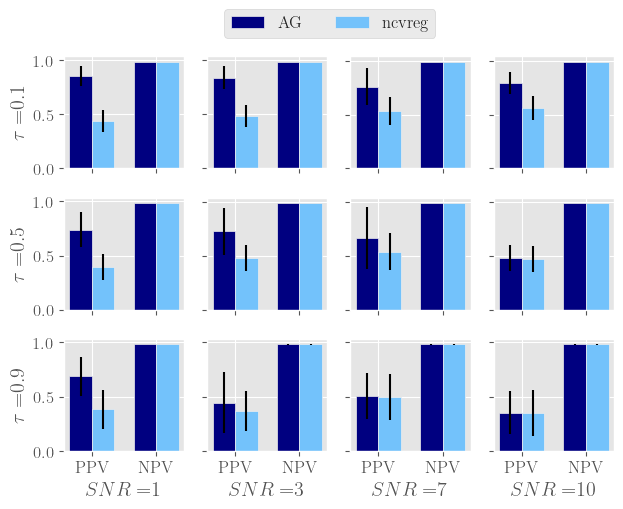

In [14]:
AG = np.load("./tasks/task1/results_MCP_signal_recovery.npy")
AG_mean = np.mean(AG, 2)
AG_se = np.std(AG, 2)
ncvreg = np.load("./SCAD_MCP/LM/R_results_MCP_signal_recovery.npy")
ncvreg=np.reshape(ncvreg, (4,3,100,5),"F") # keep array dimension true
ncvreg_mean = np.mean(ncvreg, 2)
ncvreg_se = np.std(ncvreg, 2)

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
SNR = np.array([1,3,7,10])

for i,j in itertools.product(range(3),range(4)):
    data = np.array([[AG_mean[j,i,2], ncvreg_mean[j,i,2]],
                     [AG_mean[j,i,3], ncvreg_mean[j,i,3]]])
    data_se = np.array([[AG_se[j,i,2], ncvreg_se[j,i,2]],
                        [AG_se[j,i,3], ncvreg_se[j,i,3]]])
    length = len(data)
    x_labels = ["PPV", "NPV"]
    width = 0.35 # width of bar
    x = np.arange(length)
    axes[i,j].bar(x, data[:,0], width, color='#000080', label='AG', yerr=data_se[:,0])
    axes[i,j].bar(x + width, data[:,1], width, color='#73C2FB', label='ncvreg', yerr=data_se[:,1])
#     ax.set_ylabel('Proportion')
#     ax.set_ylim(0,75)
    axes[i,j].set_xticks(x + width/2)
    axes[i,j].set_xticklabels(x_labels)
    axes[i,j].set_xlabel('Predicted Values')
#     ax.set_title('Title')
#     axes[i,j].legend()
    
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=None)

for ax in axes.flat:
    ax.label_outer()

# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout(pad=.2)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=4, bbox_to_anchor=(.35, 1.075))

plt.tight_layout()
plt.savefig('LM-MCP-pv.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

# logistic -- Speed
## Iterations required to make same amount of descent
### SCAD

In [15]:
SCAD_sim_results = np.load("./tasks/task2speed/SCAD_sim_results.npy")

SCAD_sim_results_mean = np.around(np.median(SCAD_sim_results, 2),2)
print("Median:")
print("AG: ",SCAD_sim_results_mean[...,0])
print("ISTA: ",SCAD_sim_results_mean[...,1])
print("original settings: ",SCAD_sim_results_mean[...,2])
SCAD_sim_results_se = np.around(mad(SCAD_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",SCAD_sim_results_se[...,0])
print("ISTA: ",SCAD_sim_results_se[...,1])
print("original settings: ",SCAD_sim_results_se[...,2])


Median:
AG:  [[ 33.   18.   10.    7. ]
 [ 37.   19.   10.    7. ]
 [144.   46.5  27.5  16.5]]
ISTA:  [[ 193.5   74.5   24.    11. ]
 [ 249.5   76.    23.    13. ]
 [3209.   256.5   95.    45. ]]
original settings:  [[ 48.5  29.5  17.5  12. ]
 [ 55.   31.   17.   13. ]
 [207.   70.5  41.   26.5]]
Scaled MAD: 
AG:  [[ 4.45  3.71  1.48  1.48]
 [ 4.45  2.97  1.48  1.48]
 [68.2  14.83  9.64  5.19]]
ISTA:  [[4.96700e+01 2.89100e+01 4.45000e+00 1.48000e+00]
 [6.44900e+01 3.18800e+01 5.93000e+00 1.48000e+00]
 [2.78655e+03 1.62340e+02 5.11500e+01 1.92700e+01]]
original settings:  [[  5.93   5.19   1.48   1.48]
 [  5.93   5.93   1.48   1.48]
 [100.82  24.46  14.83   6.67]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


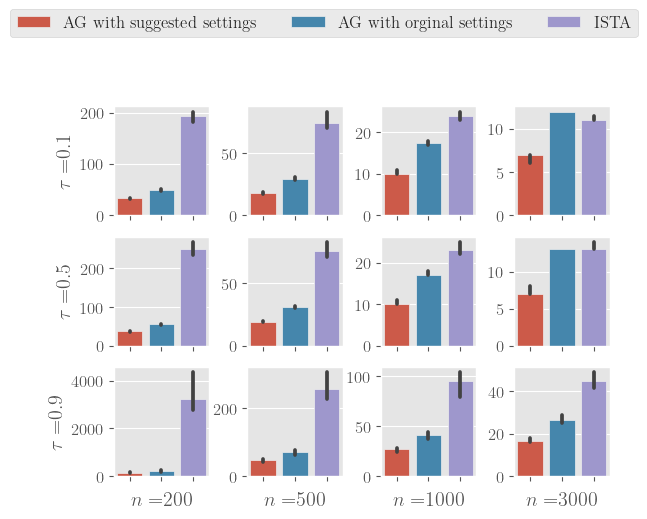

In [16]:
fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'AG with orginal settings'], data=SCAD_sim_results[i,j,...])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'AG with orginal settings', 'ISTA'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('logistic-fig_k_SCAD.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

### MCP

In [17]:
MCP_sim_results = np.load("./tasks/task2speed/MCP_sim_results.npy")

MCP_sim_results_mean = np.median(MCP_sim_results, 2)
print("Median:")
print("AG: ",MCP_sim_results_mean[...,0])
print("ISTA: ",MCP_sim_results_mean[...,1])
print("original settings: ",MCP_sim_results_mean[...,2])
MCP_sim_results_se = np.around(mad(MCP_sim_results, 2)*1.4826,2)
print("Scaled MAD: ")
print("AG: ",MCP_sim_results_se[...,0])
print("ISTA: ",MCP_sim_results_se[...,1])
print("original settings: ",MCP_sim_results_se[...,2])


Median:
AG:  [[22.  29.5 10.   7. ]
 [24.  25.  11.   7. ]
 [62.  48.5 27.  18. ]]
ISTA:  [[ 80.  187.   22.   11. ]
 [ 96.  123.5  25.5  13. ]
 [598.  264.  106.   49. ]]
original settings:  [[33.  45.  17.  12. ]
 [37.  39.  18.  13. ]
 [92.  72.  43.  28.5]]
Scaled MAD: 
AG:  [[ 1.48 12.6   1.48  0.  ]
 [ 1.48  5.93  1.48  0.  ]
 [14.83 14.08  8.9   5.93]]
ISTA:  [[  7.41 135.66   2.97   1.48]
 [ 10.38  67.46   6.67   1.48]
 [247.59 137.88  53.37  22.24]]
original settings:  [[ 1.48 18.53  1.48  1.48]
 [ 2.97  9.64  2.97  1.48]
 [20.76 20.76 13.34  8.15]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


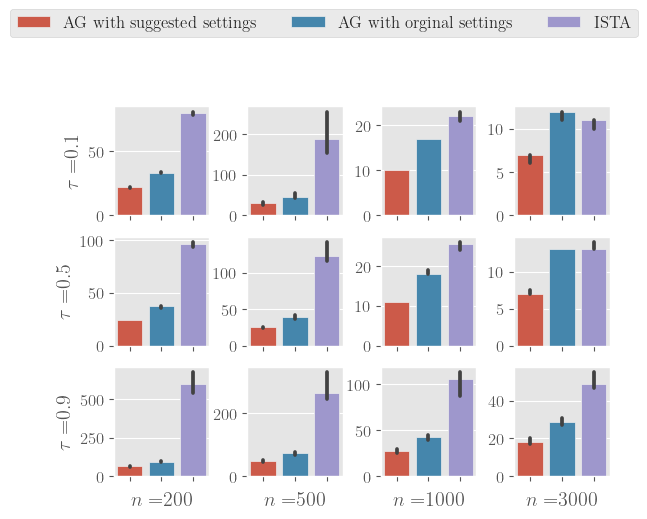

In [18]:
fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
N = np.array([200,500,1000,3000])

for i,j in itertools.product(range(3),range(4)):
    df=pd.DataFrame(columns=['AG with suggested settings', 'ISTA', 'AG with orginal settings'], data=MCP_sim_results[i,j,...])
    df_melted = pd.melt(df, id_vars=[], value_vars=['AG with suggested settings', 'AG with orginal settings', 'ISTA'], var_name='method', value_name='k')
#     sns.boxplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", showfliers = False)#.set_title(r'$\tau=$'+str(tau[i])+'$, N=$'+str(N[j]))
    sns.barplot(ax=axes[i, j], data=df_melted, x="method", y="k", hue="method", estimator=np.median, ci=95, dodge=False)#, palette = "Greys")
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=r"$n=$"+str(N[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=[], xlabel=r"$n=$"+str(N[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=[], xlabel=None, ylabel=None)
        
    axes[i, j].get_legend().remove()


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=3, bbox_to_anchor=(-.05, 1.1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)

#plt.tight_layout()
plt.savefig('logistic-fig_k_MCP.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

# logistic -- Signals
## SCAD
### AG

In [19]:
results_SCAD_signal_recovery = np.load("./tasks/task2/results_SCAD_signal_recovery.npy")

results_SCAD_signal_recovery_mean = np.around(np.mean(results_SCAD_signal_recovery, 2),3)
results_SCAD_signal_recovery_se = np.around(np.std(results_SCAD_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_SCAD_signal_recovery_mean[...,0], results_SCAD_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_SCAD_signal_recovery_mean[...,1], results_SCAD_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_SCAD_signal_recovery_mean[...,2], results_SCAD_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_SCAD_signal_recovery_mean[...,3], results_SCAD_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_SCAD_signal_recovery_se[...,4]))

# results_SCAD_signal_recovery_median = cp.median(results_SCAD_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_SCAD_signal_recovery_median[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_median[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_median[...,2])
# print("specificity: ",results_SCAD_signal_recovery_median[...,3])
# results_SCAD_signal_recovery_mad = mad(results_SCAD_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_SCAD_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_mad[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_mad[...,2])
# print("specificity: ",results_SCAD_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.762 (0.046)' '0.808 (0.04)' '0.897 (0.034)']
 ['0.553 (0.061)' '0.652 (0.055)' '0.82 (0.054)']
 ['0.393 (0.068)' '0.522 (0.068)' '0.779 (0.074)']
 ['0.319 (0.065)' '0.467 (0.085)' '0.768 (0.087)']]
infinity-norm:  [['2.379 (0.437)' '2.465 (0.408)' '2.747 (0.482)']
 ['2.003 (0.425)' '2.171 (0.402)' '2.632 (0.468)']
 ['1.661 (0.391)' '1.897 (0.371)' '2.615 (0.417)']
 ['1.479 (0.374)' '1.786 (0.39)' '2.577 (0.425)']]
PPV:  [['0.786 (0.082)' '0.775 (0.095)' '0.688 (0.121)']
 ['0.869 (0.06)' '0.853 (0.077)' '0.753 (0.109)']
 ['0.913 (0.045)' '0.873 (0.059)' '0.794 (0.094)']
 ['0.913 (0.048)' '0.88 (0.058)' '0.792 (0.095)']]
NPV:  [['0.982 (0.001)' '0.981 (0.001)' '0.978 (0.0)']
 ['0.985 (0.002)' '0.983 (0.001)' '0.979 (0.001)']
 ['0.987 (0.002)' '0.984 (0.001)' '0.979 (0.001)']
 ['0.988 (0.002)' '0.984 (0.001)' '0.979 (0.001)']]
active set cardi:  [['17.78 (4.063)' '13.78 (3.339)' '7.76 (2.173)']
 ['23.55 (5.222)' '17.24 (3.29)' '9.13 (2.477)']
 ['25.92 (4.064)' '

### ncvreg

In [20]:
results_SCAD_signal_recovery = np.load("./SCAD_MCP/logistic/R_results_SCAD_signal_recovery.npy")
results_SCAD_signal_recovery=np.reshape(results_SCAD_signal_recovery, (4,3,100,5),"F") # keep array dimension true

results_SCAD_signal_recovery_mean = np.around(np.mean(results_SCAD_signal_recovery, 2),3)
results_SCAD_signal_recovery_se = np.around(np.std(results_SCAD_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_SCAD_signal_recovery_mean[...,0], results_SCAD_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_SCAD_signal_recovery_mean[...,1], results_SCAD_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_SCAD_signal_recovery_mean[...,2], results_SCAD_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_SCAD_signal_recovery_mean[...,3], results_SCAD_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_SCAD_signal_recovery_se[...,4]))

# results_SCAD_signal_recovery_median = cp.median(results_SCAD_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_SCAD_signal_recovery_median[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_median[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_median[...,2])
# print("specificity: ",results_SCAD_signal_recovery_median[...,3])
# results_SCAD_signal_recovery_mad = mad(results_SCAD_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_SCAD_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_SCAD_signal_recovery_mad[...,1])
# print("sensitivity: ",results_SCAD_signal_recovery_mad[...,2])
# print("specificity: ",results_SCAD_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.804 (0.036)' '0.84 (0.032)' '0.903 (0.033)']
 ['0.601 (0.05)' '0.68 (0.061)' '0.81 (0.054)']
 ['0.436 (0.062)' '0.537 (0.086)' '0.742 (0.067)']
 ['0.379 (0.067)' '0.481 (0.084)' '0.716 (0.076)']]
infinity-norm:  [['2.446 (0.438)' '2.518 (0.417)' '2.704 (0.49)']
 ['2.095 (0.41)' '2.203 (0.402)' '2.576 (0.426)']
 ['1.773 (0.407)' '1.906 (0.401)' '2.497 (0.407)']
 ['1.625 (0.397)' '1.78 (0.379)' '2.481 (0.374)']]
PPV:  [['0.223 (0.047)' '0.261 (0.072)' '0.308 (0.172)']
 ['0.246 (0.046)' '0.266 (0.077)' '0.271 (0.147)']
 ['0.272 (0.055)' '0.283 (0.068)' '0.275 (0.121)']
 ['0.285 (0.054)' '0.285 (0.068)' '0.275 (0.129)']]
NPV:  [['0.987 (0.002)' '0.985 (0.002)' '0.98 (0.001)']
 ['0.99 (0.002)' '0.987 (0.002)' '0.98 (0.001)']
 ['0.992 (0.002)' '0.988 (0.001)' '0.98 (0.001)']
 ['0.992 (0.002)' '0.989 (0.001)' '0.981 (0.001)']]
active set cardi:  [['117.78 (29.691)' '86.54 (27.524)' '39.6 (20.86)']
 ['133.66 (29.134)' '101.39 (30.161)' '45.59 (19.916)']
 ['129.34 (26

### plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


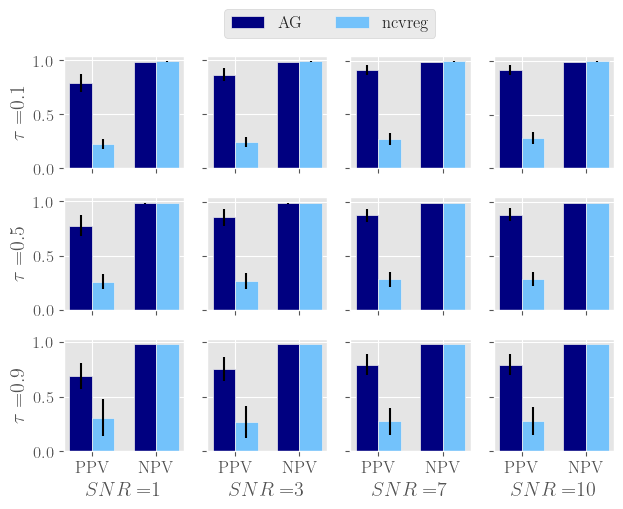

In [21]:
AG = np.load("./tasks/task2/results_SCAD_signal_recovery.npy")
AG_mean = np.mean(AG, 2)
AG_se = np.std(AG, 2)
ncvreg = np.load("./SCAD_MCP/logistic/R_results_SCAD_signal_recovery.npy")
ncvreg=np.reshape(ncvreg, (4,3,100,5),"F") # keep array dimension true
ncvreg_mean = np.mean(ncvreg, 2)
ncvreg_se = np.std(ncvreg, 2)

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
SNR = np.array([1,3,7,10])

for i,j in itertools.product(range(3),range(4)):
    data = np.array([[AG_mean[j,i,2], ncvreg_mean[j,i,2]],
                     [AG_mean[j,i,3], ncvreg_mean[j,i,3]]])
    data_se = np.array([[AG_se[j,i,2], ncvreg_se[j,i,2]],
                        [AG_se[j,i,3], ncvreg_se[j,i,3]]])
    length = len(data)
    x_labels = ["PPV", "NPV"]
    width = 0.35 # width of bar
    x = np.arange(length)
    axes[i,j].bar(x, data[:,0], width, color='#000080', label='AG', yerr=data_se[:,0])
    axes[i,j].bar(x + width, data[:,1], width, color='#73C2FB', label='ncvreg', yerr=data_se[:,1])
#     ax.set_ylabel('Proportion')
#     ax.set_ylim(0,75)
    axes[i,j].set_xticks(x + width/2)
    axes[i,j].set_xticklabels(x_labels)
    axes[i,j].set_xlabel('Predicted Values')
#     ax.set_title('Title')
#     axes[i,j].legend()
    
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=None)

for ax in axes.flat:
    ax.label_outer()

# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout(pad=.2)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=4, bbox_to_anchor=(.35, 1.075))

plt.tight_layout()
plt.savefig('logistic-SCAD-pv.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()

## MCP
### AG

In [22]:
results_MCP_signal_recovery = np.load("./tasks/task2/results_MCP_signal_recovery.npy")

results_MCP_signal_recovery_mean = np.around(np.mean(results_MCP_signal_recovery, 2),3)
results_MCP_signal_recovery_se = np.around(np.std(results_MCP_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_MCP_signal_recovery_mean[...,0], results_MCP_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_MCP_signal_recovery_mean[...,1], results_MCP_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_MCP_signal_recovery_mean[...,2], results_MCP_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_MCP_signal_recovery_mean[...,3], results_MCP_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_MCP_signal_recovery_mean[...,4], results_MCP_signal_recovery_se[...,4]))

# results_MCP_signal_recovery_median = cp.median(results_MCP_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_MCP_signal_recovery_median[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_median[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_median[...,2])
# print("specificity: ",results_MCP_signal_recovery_median[...,3])
# results_MCP_signal_recovery_mad = mad(results_MCP_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_MCP_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_mad[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_mad[...,2])
# print("specificity: ",results_MCP_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.76 (0.045)' '0.808 (0.041)' '0.895 (0.035)']
 ['0.551 (0.065)' '0.654 (0.06)' '0.819 (0.056)']
 ['0.387 (0.073)' '0.522 (0.074)' '0.767 (0.071)']
 ['0.316 (0.068)' '0.466 (0.08)' '0.762 (0.079)']]
infinity-norm:  [['2.379 (0.441)' '2.469 (0.408)' '2.735 (0.476)']
 ['2.005 (0.426)' '2.172 (0.41)' '2.621 (0.452)']
 ['1.651 (0.401)' '1.894 (0.377)' '2.578 (0.422)']
 ['1.473 (0.376)' '1.788 (0.383)' '2.586 (0.434)']]
PPV:  [['0.872 (0.06)' '0.866 (0.055)' '0.776 (0.106)']
 ['0.903 (0.046)' '0.886 (0.058)' '0.788 (0.097)']
 ['0.922 (0.041)' '0.899 (0.053)' '0.811 (0.084)']
 ['0.921 (0.039)' '0.897 (0.054)' '0.795 (0.103)']]
NPV:  [['0.982 (0.001)' '0.98 (0.001)' '0.978 (0.001)']
 ['0.985 (0.002)' '0.982 (0.001)' '0.979 (0.001)']
 ['0.987 (0.002)' '0.984 (0.001)' '0.98 (0.001)']
 ['0.988 (0.002)' '0.984 (0.001)' '0.98 (0.001)']]
active set cardi:  [['14.62 (3.61)' '11.27 (2.561)' '7.04 (2.135)']
 ['22.06 (5.093)' '16.08 (3.638)' '9.05 (2.251)']
 ['25.56 (4.435)' '1

### ncvreg

In [23]:
results_MCP_signal_recovery = np.load("./SCAD_MCP/logistic/R_results_MCP_signal_recovery.npy")
results_MCP_signal_recovery=np.reshape(results_MCP_signal_recovery, (4,3,100,5),"F") # keep array dimension true

results_MCP_signal_recovery_mean = np.around(np.mean(results_MCP_signal_recovery, 2),3)
results_MCP_signal_recovery_se = np.around(np.std(results_MCP_signal_recovery, 2),3)
print("Sample mean:")
print("2-norm: ",pasta(results_MCP_signal_recovery_mean[...,0], results_MCP_signal_recovery_se[...,0]))
print("infinity-norm: ",pasta(results_MCP_signal_recovery_mean[...,1], results_MCP_signal_recovery_se[...,1]))
print("PPV: ",pasta(results_MCP_signal_recovery_mean[...,2], results_MCP_signal_recovery_se[...,2]))
print("NPV: ",pasta(results_MCP_signal_recovery_mean[...,3], results_MCP_signal_recovery_se[...,3]))
print("active set cardi: ",pasta(results_SCAD_signal_recovery_mean[...,4], results_MCP_signal_recovery_se[...,4]))

# results_MCP_signal_recovery_median = cp.median(results_MCP_signal_recovery, 2)
# print("Sample median:")
# print("2-norm: ",results_MCP_signal_recovery_median[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_median[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_median[...,2])
# print("specificity: ",results_MCP_signal_recovery_median[...,3])
# results_MCP_signal_recovery_mad = mad(results_MCP_signal_recovery.get(), 2)*1.4826
# print("Scaled MAD:")
# print("2-norm: ",results_MCP_signal_recovery_mad[...,0])
# print("infinity-norm: ",results_MCP_signal_recovery_mad[...,1])
# print("sensitivity: ",results_MCP_signal_recovery_mad[...,2])
# print("specificity: ",results_MCP_signal_recovery_mad[...,3])

Sample mean:
2-norm:  [['0.796 (0.034)' '0.83 (0.032)' '0.904 (0.035)']
 ['0.598 (0.05)' '0.668 (0.061)' '0.827 (0.055)']
 ['0.434 (0.057)' '0.537 (0.074)' '0.754 (0.07)']
 ['0.381 (0.059)' '0.474 (0.08)' '0.741 (0.075)']]
infinity-norm:  [['2.439 (0.442)' '2.501 (0.416)' '2.719 (0.471)']
 ['2.098 (0.414)' '2.187 (0.402)' '2.606 (0.424)']
 ['1.772 (0.402)' '1.91 (0.385)' '2.554 (0.459)']
 ['1.644 (0.389)' '1.77 (0.382)' '2.54 (0.437)']]
PPV:  [['0.378 (0.074)' '0.4 (0.1)' '0.382 (0.154)']
 ['0.427 (0.075)' '0.424 (0.096)' '0.399 (0.142)']
 ['0.468 (0.073)' '0.467 (0.097)' '0.429 (0.139)']
 ['0.493 (0.069)' '0.475 (0.101)' '0.427 (0.149)']]
NPV:  [['0.986 (0.002)' '0.983 (0.001)' '0.978 (0.001)']
 ['0.989 (0.002)' '0.985 (0.001)' '0.979 (0.001)']
 ['0.99 (0.002)' '0.986 (0.001)' '0.98 (0.001)']
 ['0.991 (0.002)' '0.987 (0.001)' '0.98 (0.001)']]
active set cardi:  [['117.78 (13.338)' '86.54 (12.134)' '39.6 (8.82)']
 ['133.66 (14.005)' '101.39 (15.427)' '45.59 (8.351)']
 ['129.34 (12.959)

### plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


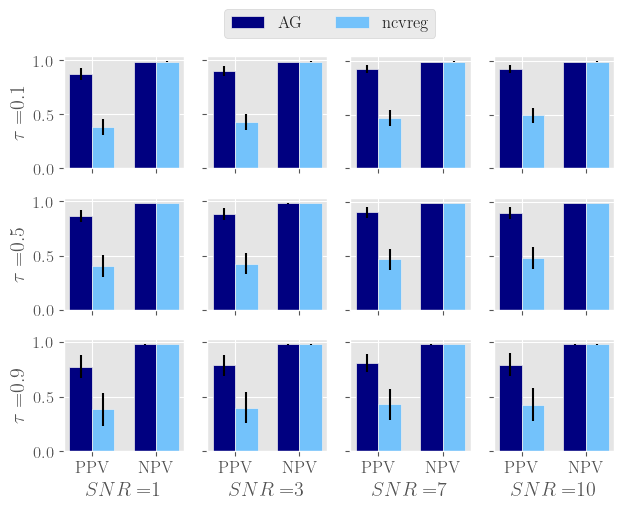

In [24]:
AG = np.load("./tasks/task2/results_MCP_signal_recovery.npy")
AG_mean = np.mean(AG, 2)
AG_se = np.std(AG, 2)
ncvreg = np.load("./SCAD_MCP/logistic/R_results_MCP_signal_recovery.npy")
ncvreg=np.reshape(ncvreg, (4,3,100,5),"F") # keep array dimension true
ncvreg_mean = np.mean(ncvreg, 2)
ncvreg_se = np.std(ncvreg, 2)

fig, axes = plt.subplots(3, 4)

tau = np.array([.1,.5,.9])
SNR = np.array([1,3,7,10])

for i,j in itertools.product(range(3),range(4)):
    data = np.array([[AG_mean[j,i,2], ncvreg_mean[j,i,2]],
                     [AG_mean[j,i,3], ncvreg_mean[j,i,3]]])
    data_se = np.array([[AG_se[j,i,2], ncvreg_se[j,i,2]],
                        [AG_se[j,i,3], ncvreg_se[j,i,3]]])
    length = len(data)
    x_labels = ["PPV", "NPV"]
    width = 0.35 # width of bar
    x = np.arange(length)
    axes[i,j].bar(x, data[:,0], width, color='#000080', label='AG', yerr=data_se[:,0])
    axes[i,j].bar(x + width, data[:,1], width, color='#73C2FB', label='ncvreg', yerr=data_se[:,1])
#     ax.set_ylabel('Proportion')
#     ax.set_ylim(0,75)
    axes[i,j].set_xticks(x + width/2)
    axes[i,j].set_xticklabels(x_labels)
    axes[i,j].set_xlabel('Predicted Values')
#     ax.set_title('Title')
#     axes[i,j].legend()
    
    if i==2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[j]), ylabel=None) # yticklabels=[] to remove y scales
    if j==0 and i!=2:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=r"$\tau=$"+str(tau[i]))
    axes[2, 0].set(xticklabels=x_labels, xlabel=r"$SNR=$"+str(SNR[0]), ylabel=r"$\tau=$"+str(tau[2]))
    if i!=2 and j!=0:
        axes[i, j].set(xticklabels=x_labels, xlabel=None, ylabel=None)

for ax in axes.flat:
    ax.label_outer()

# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout(pad=.2)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', ncol=4, bbox_to_anchor=(.35, 1.075))

plt.tight_layout()
plt.savefig('logistic-MCP-pv.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()